In [65]:
# import modul dan inisialisasi spark
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator


spark = SparkSession.builder.appName("KMeansExample").getOrCreate()

### <center>Membaca Dataset</center>

In [66]:
data = spark.read.csv("ds_salaries.csv", header=True, inferSchema=True)

### <center>Inisialisasi StringIndexer dan Penerapan StringIndexer</center>

In [67]:
indexer = StringIndexer(inputCol="experience_level", outputCol="experience_level_index")

data = indexer.fit(data).transform(data)

### <center>Menggabungkan fitur-fitur yang akan digunakan dalam clustering</center>

In [68]:
feature_cols = ["salary_in_usd", "experience_level_index"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)

### <center>Pelatihan Model K-Means</center>

In [69]:
# Pelatihan model K-Means
kmeans = KMeans().setK(2).setSeed(1)  # Ganti K sesuai kebutuhan
model = kmeans.fit(data)

### <center>Menambahkan Kolom "prediction" ke data</center>

In [70]:
predictions = model.transform(data)

### <center>Menghitung nilai evaluasi clustering</center>

In [71]:
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.7010191800864225


### <center>Menampilkan hasil Clustering</center>

In [63]:
# Menampilkan hasil clustering
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[9.96621307e+04 5.75976231e-01]
[2.01410174e+05 3.07362402e-01]


In [64]:
# Menutup sesi Spark
spark.stop()

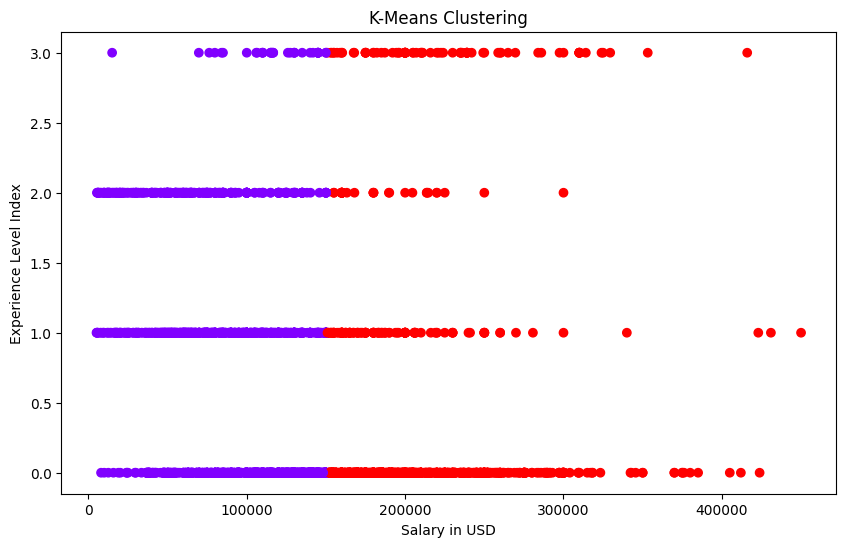

In [72]:
import matplotlib.pyplot as plt

# Ambil prediksi kluster dari DataFrame
cluster_predictions = predictions.select("prediction").rdd.map(lambda row: row[0]).collect()

# Ambil fitur hasil reduksi dari DataFrame
features = predictions.select("features").rdd.map(lambda row: row[0]).collect()

# Pisahkan fitur menjadi dua kolom (salary_in_usd dan experience_level_index)
salary_in_usd = [feature[0] for feature in features]
experience_level_index = [feature[1] for feature in features]

# Buat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(salary_in_usd, experience_level_index, c=cluster_predictions, cmap='rainbow')
plt.xlabel("Salary in USD")
plt.ylabel("Experience Level Index")
plt.title("K-Means Clustering")
plt.show()


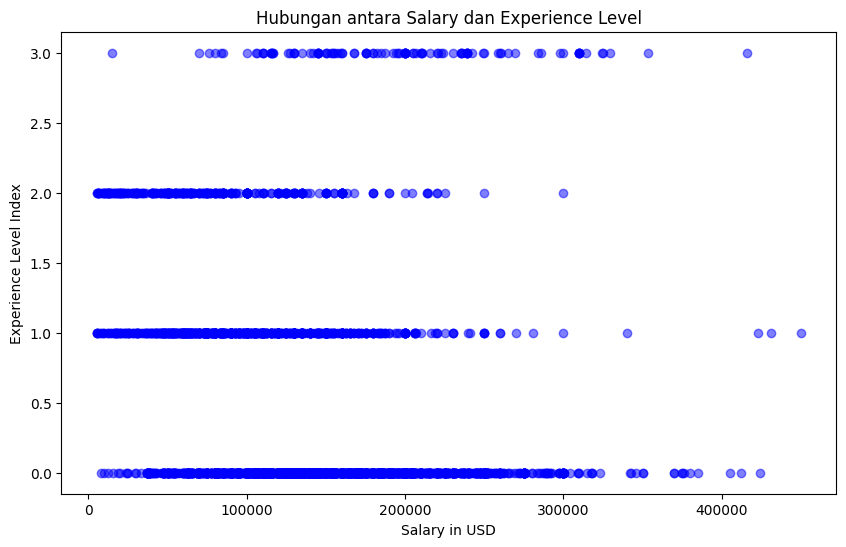

In [73]:
import matplotlib.pyplot as plt

# Ambil kolom "salary_in_usd" dan "experience_level_index" dari DataFrame
salary_in_usd = data.select("salary_in_usd").rdd.map(lambda row: row[0]).collect()
experience_level_index = data.select("experience_level_index").rdd.map(lambda row: row[0]).collect()

# Buat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(salary_in_usd, experience_level_index, c='blue', alpha=0.5)
plt.xlabel("Salary in USD")
plt.ylabel("Experience Level Index")
plt.title("Hubungan antara Salary dan Experience Level")
plt.show()
